In [1]:
# ##################################################################################
# Archimedes, Measurement of a circle
# ----------------------------------------------------------------------------------
#
# Development of the Archimedes equations for the outer polygon.
# Version 0.3
# 
# developed, written and tested in 2023 by Dr. Peter Netz
#
# Published under the MIT-Licence.
# Copyright (c) 2023, Dr. Peter Netz
#
# I would be pleased to be mentioned if this work is useful and used for further
# studies.
#
# This is the complete theory of the circumscribed polygon for calculating pi 
# based on the theory of Archimedes (plus algorithms).
#
# Archimedes, Measurement of a circle, Proposition 3 Part I contains the 
# solution for the calculation of an approximation of pi via circumscribed outer 
# polygons. The derivation carried out by hand is checked below with SageMath 
# using a symbolic calculation. The derivation can be checked using an iterative 
# algorithm. 
#
# The geometric relationships for the inscribed polygon are more difficult to 
# grasp than for the circumscribed polygon. Knowledge of the ray theorem, Thales'
# theorem, Pythagoras' theorem and Euclid's theorems is necessary to understand
# the derivation. 
#
# The following derivations are almost completely automated, so that errors can be 
# avoided. Some terms had to be used and edited by copy and paste in order to use 
# them specifically.
# 
# Open issues are:
# How can an expression be extracted from a square root in symbolic calculus.
#
# To-Do: 
# Carry out further calculations. Improvement of the documentation. Optimisation 
# and improvement of the derivations. Check the influence of square roots on the
# calculations  
# 
# ----------------------------------------------------------------------------------
# References
#
# [1] T. L. HEATH, Sc.D., The Works of Archimedes, EDITED IN MODERN NOTATION, 
# WITH INTRODUCTORY CHAPTERS, CAMBRIDGE: AT THE UNIVERSITY PRESS, 1897
# [2] Dr. Saskia Roos, Michael Jung, An Introductory Course on Sage, Lecture
# Notes Summer Term 2020, University of Potsdam, Sep 30, 2020
# [3] SageMath, The Sage Development Team, Symbolic Calculus, Release 10.1, 
# Aug 21, 2023
# [4] SageMath, the Sage Mathematics Software System (Version 10.1), The Sage
# Developers, https://www.sagemath.org, 2019
# [5] mathworld.wolfram.com/ArchimedesAlgorithm.html
# ##################################################################################

In [2]:
html("""<font color='purple'><b><H1>User defined functions</H1></b></font><br/>""")

<font color='purple'><b><H1>User defined functions</H1></b></font><br/>

In [3]:
# User defined function println for printing lines.
def println(exp):
    '''Function for printing lines with line spacing in form of newlines before
    and after the line. We have to take care that an SageMath expressions is 
    converted to a string before printing.'''
    # Convert the type of line to a string.
    line = str(exp)
    # Print text, a line or a string to the notebook.
    print("\n{0}\n".format(line))
    # End of func

In [4]:
# Initialise the global variables.
EqNo = 0
LnLen = 80
# LnLen = -1 <- Disabled global LnLen

# User defined function println_eqno for printing equations.
def println_eqno(exp, lnlen=80):
    '''Function for printing lines with line spacing in form of newlines before
    and after the line.'''
    global EqNo, LnLen
    if LnLen != -1:
        lnlen = LnLen
    # Convert the type of line to a string.
    line = str(exp)
    # Calculate the necessary number of spaces. 
    spclen = lnlen - len(line)
    # Create the string with the spaces.
    space = "".join(u'\u0020' for i in range(spclen))
    # Print text, a line or a string to the notebook.
    EqNo += 1
    print("\n{0}{1}(Equation {2})\n".format(line, space, EqNo))
    exp.show()
    # End of function. Return None.
    return None

In [5]:
def plot_figure(imgfn, xsize=8, ysize=8):
    '''Use matlibplot to show an image.'''
    # Import the matplotlib modules by name.
    import matplotlib.pyplot as plt
    import matplotlib.image as img
    import matplotlib.image as figure
    # Read the PNG graphic file.
    img = img.imread(imgfn) 
    # Do not show axes and frame.
    plt.axis('off')
    # Scale the image on the notebook.
    # plt.rcdefaults() resets the image size.
    plt.rcParams['figure.figsize'] = [xsize, ysize]
    # Change the paramter for a larger or a smaller graphic.   
    # plt.title('Title of the graphic') adds a title to the image.
    plt.imshow(img)
    plt.show()
    # End of function. Return None.
    return None

In [6]:
# User defined function fractional number.
def fractional_number(decnum, maxexp, ROUND=True):
    '''Generator for calculating a fractional number from a given decimal 
    number. The generator can run infinite. Rounding to the correct value
    is done by the Python function round().'''
    # Initialise the counter for the exponent to base 10.
    exp = 0
    # Initialise numerator and denominator.
    nr = ''
    dr = ''
    # Initialise the potential value.
    potval = 0
    if ROUND is True:
        decnum = str(round(decnum, maxexp))
    # Run an infinite loop.
    while exp <= maxexp:
        decnum = float(decnum)
        # Cut off the decimal places.
        bd = str(decnum).split('.')[0]
        ad = str(decnum).split('.')[1]
        decpls = float("0." + ad)
        # Cut off the number before the decimal point.
        decnum = int(decnum)
        # Join the integer numbers.
        dr = dr + str(decnum)
        # Calculate the denominator.
        potval = 10^exp
        # Get the denominator number.
        nr = str(potval)
        # Multiply the decimal places with 10.
        decpls *= 10
        # Store the new decimal number.
        decnum = decpls
        # Increment the exponential counter.
        exp += 1
        # Return the numerator and the denominator.
    return nr, dr

In [7]:
html("""<font color='blue'><b><H1>Archimedes, Measurement of a Circle<br>Construction of Figure 3</H1></b></font><br/>""")

<font color='blue'><b><H1>Archimedes, Measurement of a Circle<br>Construction of Figure 3</H1></b></font><br/>

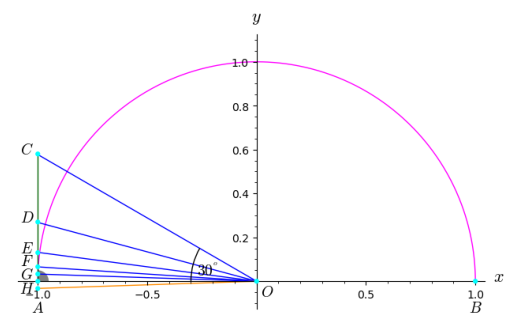

In [8]:
plot_figure("archimedes_figure3.png")

In [9]:
html("""<font color='blue'><b><H1>Archimedes, Measurement of a Circle<br>
Derivation of the iterative determination equations</H1></b></font><br/>""")

<font color='blue'><b><H1>Archimedes, Measurement of a Circle<br>
Derivation of the iterative determination equations</H1></b></font><br/>

In [10]:
# Introduce a simple relation from the given figure.
var('AD AC CD')
eq0 = AC == CD + AD
println("The straight line AC can be divided in point D:")
println(eq0)


The straight line AC can be divided in point D:


AC == AD + CD



In [11]:
# Apply Euclid Book VI Proposition 3.
var('OC OA CD AD')
println("Applying Euclid Book VI Proposition 3 results in:")
eq1 = OC / OA == CD / AD
println_eqno(eq1)


Applying Euclid Book VI Proposition 3 results in:


OC/OA == CD/AD                                                                  (Equation 1)



OC/OA == CD/AD

In [12]:
# Solve the equation for DA.
eq2 = solve(eq1, AD)
println("The equation is transformed according to AD:")
println_eqno(eq2[0])


The equation is transformed according to AD:


AD == CD*OA/OC                                                                  (Equation 2)



AD == CD*OA/OC

In [37]:
var('AC')
# Solve the equation for DA.
println("The equation AC = CD + AD is transformed according to CD:")
eq3 = solve(eq0, CD)
println_eqno(eq3[0])


The equation AC = CD + AD is transformed according to CD:


CD == AC - AD                                                                   (Equation 9)



CD == AC - AD

In [14]:
eq3a = CD == AC - AD 
eq3b = AD == CD*OA/OC
eq3c = eq3b.substitute(CD=AC-AD )
println("We are using:")
println_eqno(eq3a)
println("And we are using:")
println_eqno(eq3b)
println("Finally the relation AC = CD + AD is used in relation AD = CD*OA/OC:")
println_eqno(eq3c)


We are using:


CD == AC - AD                                                                   (Equation 4)



CD == AC - AD


And we are using:


AD == CD*OA/OC                                                                  (Equation 5)



AD == CD*OA/OC


Finally the relation AC = CD + AD is used in relation AD = CD*OA/OC:


AD == (AC - AD)*OA/OC                                                           (Equation 6)



AD == (AC - AD)*OA/OC

In [15]:
html("""<font color='green'><b><H1>Archimedes, Measurement of a Circle<br>Determination equations</H1></b></font><br/>""")

<font color='green'><b><H1>Archimedes, Measurement of a Circle<br>Determination equations</H1></b></font><br/>

In [16]:
var('AC AD OA OC')
eq4 = solve(AD == eq3c.rhs(), AD)
println("The first determining equation is:")
println_eqno(eq4[0])
eq4a = eq4[0]
# PDF viewer.
#view(eq5, viewer='pdf')


The first determining equation is:


AD == AC*OA/(OA + OC)                                                           (Equation 7)



AD == AC*OA/(OA + OC)

In [17]:
var('OD AD OA')
# Solve the equation for OD.
eq5 = solve([OD^2 == OA^2 + AD^2 ], OD)
println("The second determining equation is:")
println_eqno(eq5[1])
eq5a = eq5[1]
# PDF viewer.
#view(eq5, viewer='pdf')


The second determining equation is:


OD == sqrt(AD^2 + OA^2)                                                         (Equation 8)



OD == sqrt(AD^2 + OA^2)

In [18]:
# After the first iteration Eq. 1 and Eq. 2 are the start values for the
# next iteration. Eq. 1 is the new length of the hypothenuse and Eq. 2 is
# the new length of the edge. Archimedes did this for (6), 12, 24, 48 and
# 96 edges.

In [19]:
html("""<font color='orangered'><b><H1>Archimedes, Measurement of a Circle<br>Algorithmus</H1></b></font><br/>""")

<font color='orangered'><b><H1>Archimedes, Measurement of a Circle<br>Algorithmus</H1></b></font><br/>

In [38]:
# We are using eq4a and eq5a for testing purposes, directly.

# Outer polygon
# -------------

R = RealField(53); R
# Start values 6-gon (hexagon) for the unit circle.
#oldAC = 1/sqrt(3)
#oldOA = SR(1)
#oldOC = 2 / 3 * sqrt(3)
# Start values 6-gon (hexagon) for an arbitray circle.
oldOA = SR(1)
oldAC = oldOA * (1/sqrt(3))
oldOC = sqrt(oldOA^2 + oldAC^2)

# Number of iterations. 5 means up to a 96-gon.
numiter = 5

for i in range(0, numiter):
    # Calculate number of edges.
    n = 6 * 2^i
    # Print number of edges.
    print(n)
    # No iteration on first loop.
    if i == 0:
        # Print value of Pi.
        api = R(oldAC * 2 * n)/(2 * oldOA)
    else:    
        # Calculate hypotenuse and length of edge.
        #AD = AC*OA/(OA + OC)
        AD = eq4a.rhs()
        newAD = AD.substitute(AC=oldAC, OA=oldOA, OC=oldOC)
        #OD = sqrt(OA^2 + AD^2)
        OD = eq5a.rhs()
        newOD = OD.substitute(OA=oldOA, AD=newAD)
        # Calculate approximation for pi.
        api = R((newAD * 2 * n) / (2 * oldOA))
        # Store values.
        oldAC = newAD
        oldOC = newOD
    # Print value of Pi.
    print(api)

6
3.46410161513775
12
3.21539030917347
24
3.15965994209750
48
3.14608621513144
96
3.14271459964537


In [21]:
# Delete all user-defined variables, reset all global variables back to their
# default states, and reset all interfaces to other computer algebra systems.
reset('AC OA OC AD OD')

In [22]:
# Outer polygon
# -------------

# Start values 6-gon (hexagon)
AC = 1/sqrt(3)
OA = 1
OC = 2 / 3 * sqrt(3)

# Number of iterations. 5 means up to a 96-gon.
numiter = 5

for i in range(0, numiter):
    # Calculate number of edges.
    n = 6 * 2^i
    # Print number of edges.
    print(n)
    # No iteration on first loop.
    if i == 0:
        # Print value of Pi.
        print(((AC * 2 * n)/2).n())
    else:    
        # Calculate hypotenuse and length of edge.
        #AD = AC / (OC + 1)
        AD = AC*OA/(OA + OC)
        OD = sqrt(OA^2 + AD^2)
        # Calculate approximation for pi.
        api = ((AD * 2 * n) / 2).n()
        # Store values.
        AC = AD
        OC = OD
        # Print value of Pi.
        print(api)

6
3.46410161513775
12
3.21539030917347
24
3.15965994209750
48
3.14608621513144
96
3.14271459964537


In [23]:
html("""<font color='orangered'><b><H1>Archimedes, Measurement of a Circle<br>Upper bound inequalities</H1></b></font><br/>""")

<font color='orangered'><b><H1>Archimedes, Measurement of a Circle<br>Upper bound inequalities</H1></b></font><br/>

In [24]:
# Calculation of Archimedes approximation from his inequalities.
# Upper Bound.

In [25]:
# Values are taken from Archimedes, Measurement of a circle.
EQ = ['6*1/sqrt(3).n()',
      '(12*153)/(591+1/8)',
      '(24*153)/(1172+1/8)',
      '(48*153)/(2339+1/4)',
      '(96*153)/(4673+1/2)']

i = 0
for eq in EQ:
    sep = u"\u0020->\u0020"
    n = 6 * 2^i
    i += 1
    api = eval(eq)
    print("{0:<2d}{3:<6s}{1:<3d}{3:<6s}{2:>.14f}".format(i-1, n, api, sep))

0  ->   6   ->   3.46410161513775
1  ->   12  ->   3.10594205963206
2  ->   24  ->   3.13277167537592
3  ->   48  ->   3.13946777813402
4  ->   96  ->   3.14282657537178


In [26]:
# Archimedes lower bound inequality based on the 96-gon.
a = SR(14688)
b = SR(4673)
cn = SR(1)
cd = SR(2)
print("\nArchimedes lower bound inequality:\n")
show((a/(b + (cn/cd)) > 3+1/7))
#show("Numerator:", 96, "*", 153)
#show("Denominator:", b, cn/cd)
unicode_art((a/(b*(cn/cd))) > 3+1/7)
#print("\n" + str((a/(b+cn/cd)).n()), ">", (3+(10/71)).n())


Archimedes lower bound inequality:



(29376/9347) > (22/7)

29376       
───── > 22/7
 4673       

In [27]:
html("""<font color='orangered'><b><H1>Archimedes, Measurement of a Circle<br>Determine lower bound π < 3 <sup>1</sup>&frasl;<sub>7</sub></H1></b></font><br/>""")

<font color='orangered'><b><H1>Archimedes, Measurement of a Circle<br>Determine lower bound π < 3 <sup>1</sup>&frasl;<sub>7</sub></H1></b></font><br/>

In [28]:
# Substracting 3 from the upper bound fraction.
res0 = SR((14688/(4673+1/2)) - 3)
res0.show()
unicode_art(res0)

1335/9347

1335
────
9347

In [29]:
res1 = ZZ(res0.numerator()).factor()
res1

3 * 5 * 89

In [30]:
nr = ZZ(res0.numerator())
fac = 1
for i in res1:
    fac *= i[0]
    res2 = nr / i[0]
    nr = res2
print(res2)    
print(fac)

1
1335


In [31]:
res2 = res0.denominator()
print(res2)
print(fac)

9347
1335


In [32]:
res3 = (ZZ(res2) / ZZ(fac))
res3.n()

7.00149812734082

In [33]:
print(1 * nr)
print(round(1 * res3.n(), 0))

1
7


In [34]:
# Alternative solution.
def fractional_number_generator(decnum):
    '''Generator for calculating a fractional number from a given decimal 
    number. The generator can run infinite.'''
    # Initialise the counter for the exponent to base 10.
    exp = 0
    # Initialise numerator and denominator.
    nr = 0
    dr = ''
    # Run an infinite loop.
    while True:
        # Cut off the decimal places.
        decpls = decnum - int(decnum)
        # Cut off the number before the decimal point.
        decnum = int(decnum)
        # Multiply the decimal places with 10.
        decpls *= 10
        # Join the integer numbers.
        dr = dr + str(decnum)
        # Store the new decimal number.
        decnum = decpls
        # Calculate the denominator.
        nr = 10^exp
        # Increment the exponential counter.
        exp += 1
        # Yield the numerator and the denominator.
        yield nr, dr

result = fractional_number_generator(res3.n())        
    
for i in range(0,4):
    nr, dr = next(result)
    print("Step:", i, "->", nr, " / ", dr)

Step: 0 -> 1  /  7
Step: 1 -> 10  /  70
Step: 2 -> 100  /  700
Step: 3 -> 1000  /  7001


In [35]:
# Using step 1 gives the same as before.

In [36]:
# Alternative solution.
print(res3.n())    
nr, dr = fractional_number(res3.n(), 0, ROUND=True)        
print(nr, dr)    
show(SR(nr)/SR(dr))

7.00149812734082
1 7


1/7